In [1]:
import mplfinance as mpf
from pandas_datareader import data
import warnings
warnings.simplefilter('ignore')

In [2]:
start = '2020-01-01'
end = '2020-06-30'

df = data.DataReader('^N225','yahoo',start,end)

In [3]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,23365.359375,23148.529297,23319.759766,23204.859375,72800000,23204.859375
2020-01-07,23577.439453,23299.919922,23320.119141,23575.720703,64300000,23575.720703
2020-01-08,23303.210938,22951.179688,23217.490234,23204.759766,79400000,23204.759766
2020-01-09,23767.089844,23506.150391,23530.289062,23739.869141,62200000,23739.869141
2020-01-10,23903.289062,23761.080078,23813.279297,23850.570312,55900000,23850.570312
2020-01-14,24059.859375,23951.660156,23969.039062,24025.169922,64200000,24025.169922
2020-01-15,23997.390625,23875.820312,23923.480469,23916.580078,57200000,23916.580078
2020-01-16,23975.380859,23905.380859,23960.199219,23933.130859,55400000,23933.130859
2020-01-17,24115.949219,24013.750000,24103.449219,24041.259766,59400000,24041.259766


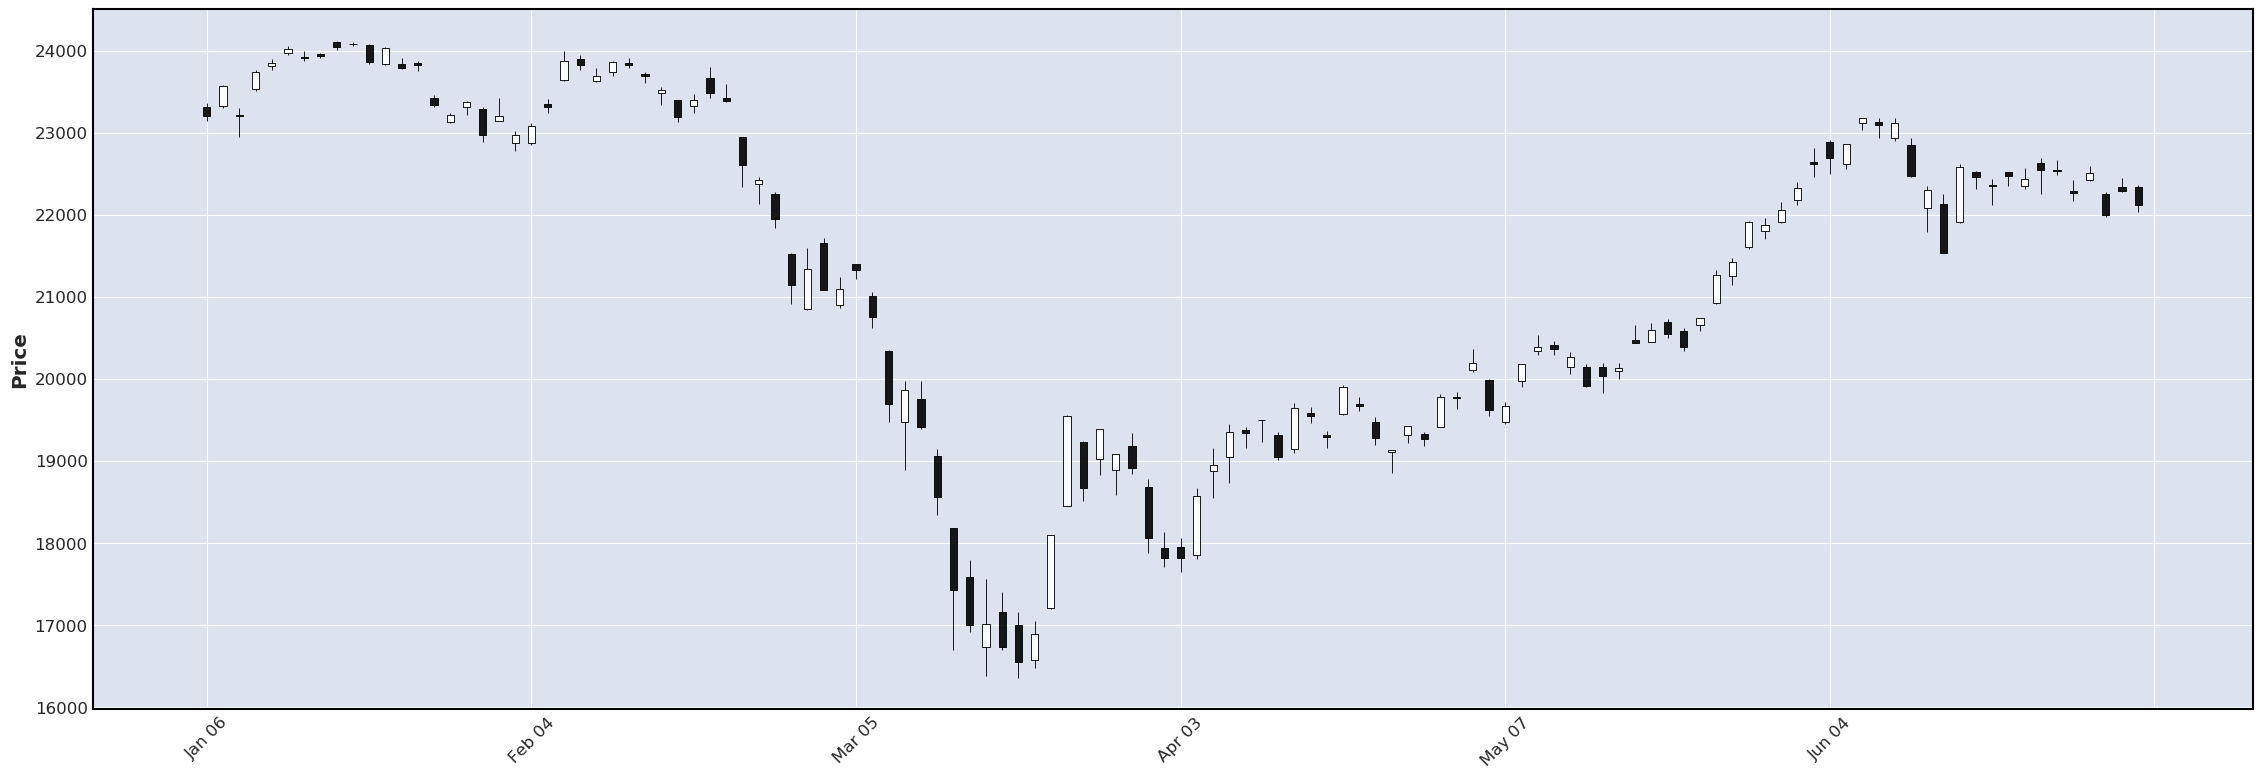

In [4]:
mpf.plot(df,type='candle',figsize=(30,10))

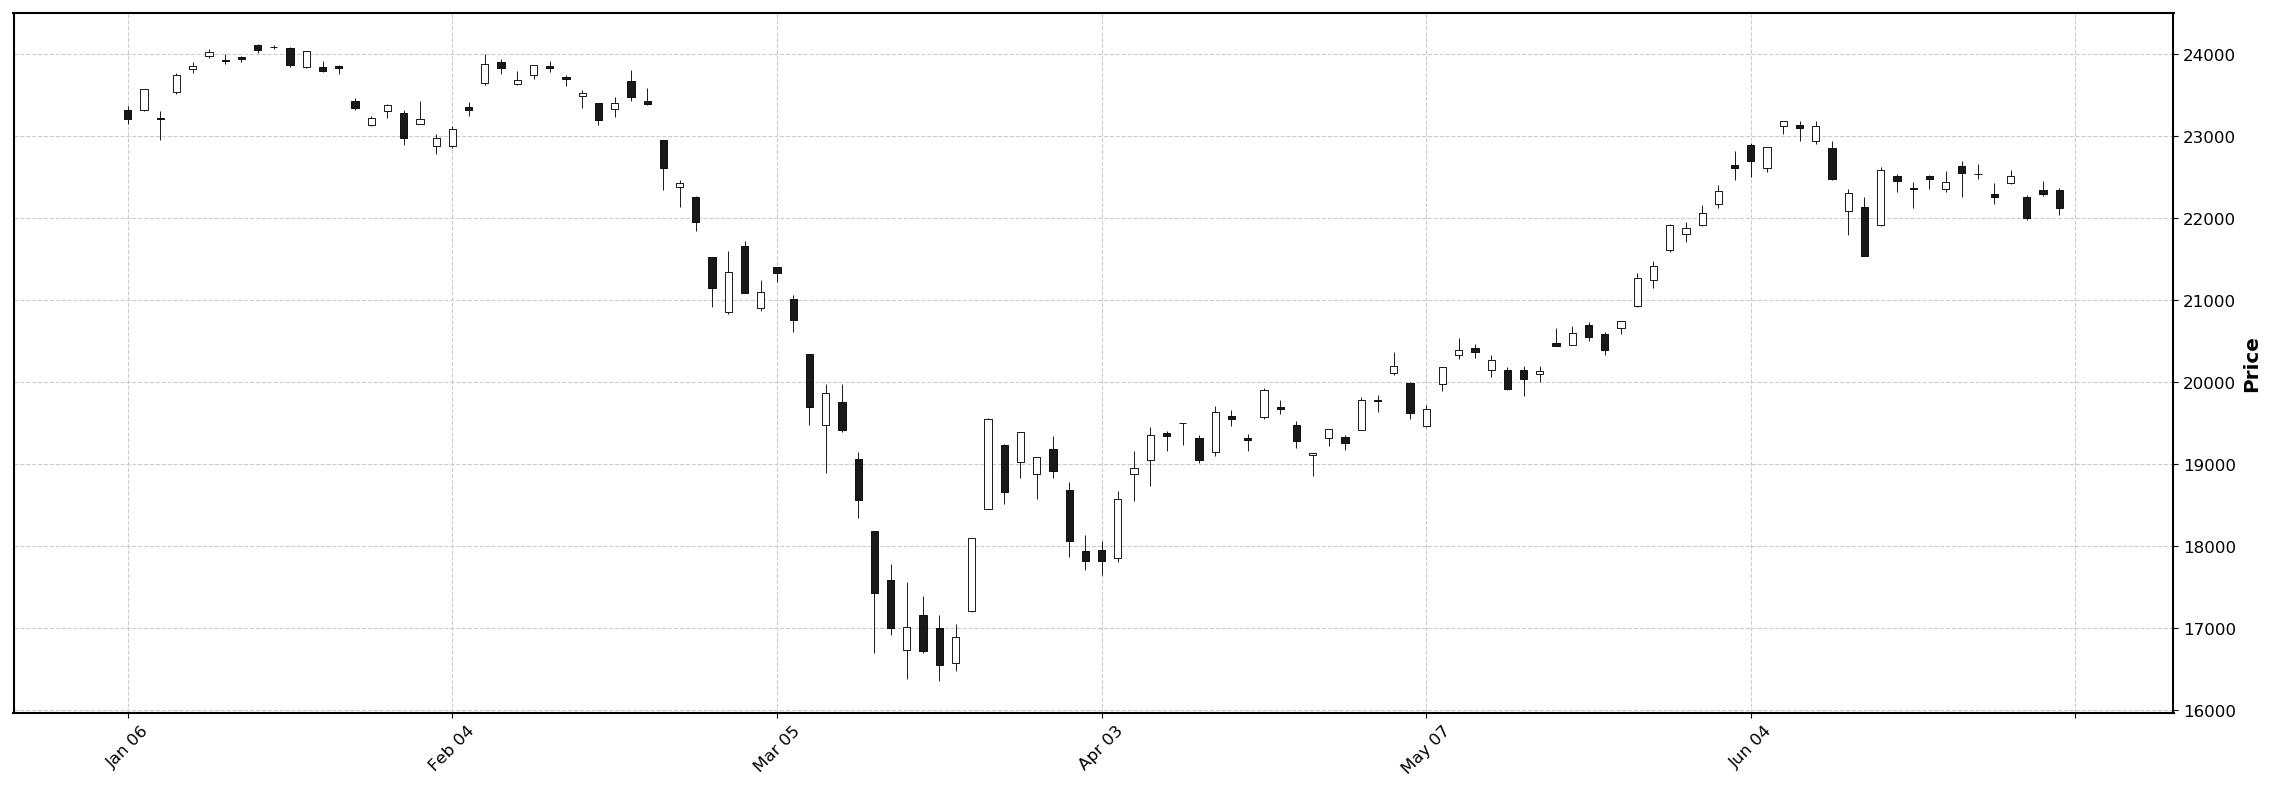

In [5]:
mpf.plot(df,type='candle',figsize=(30,10),style='classic')

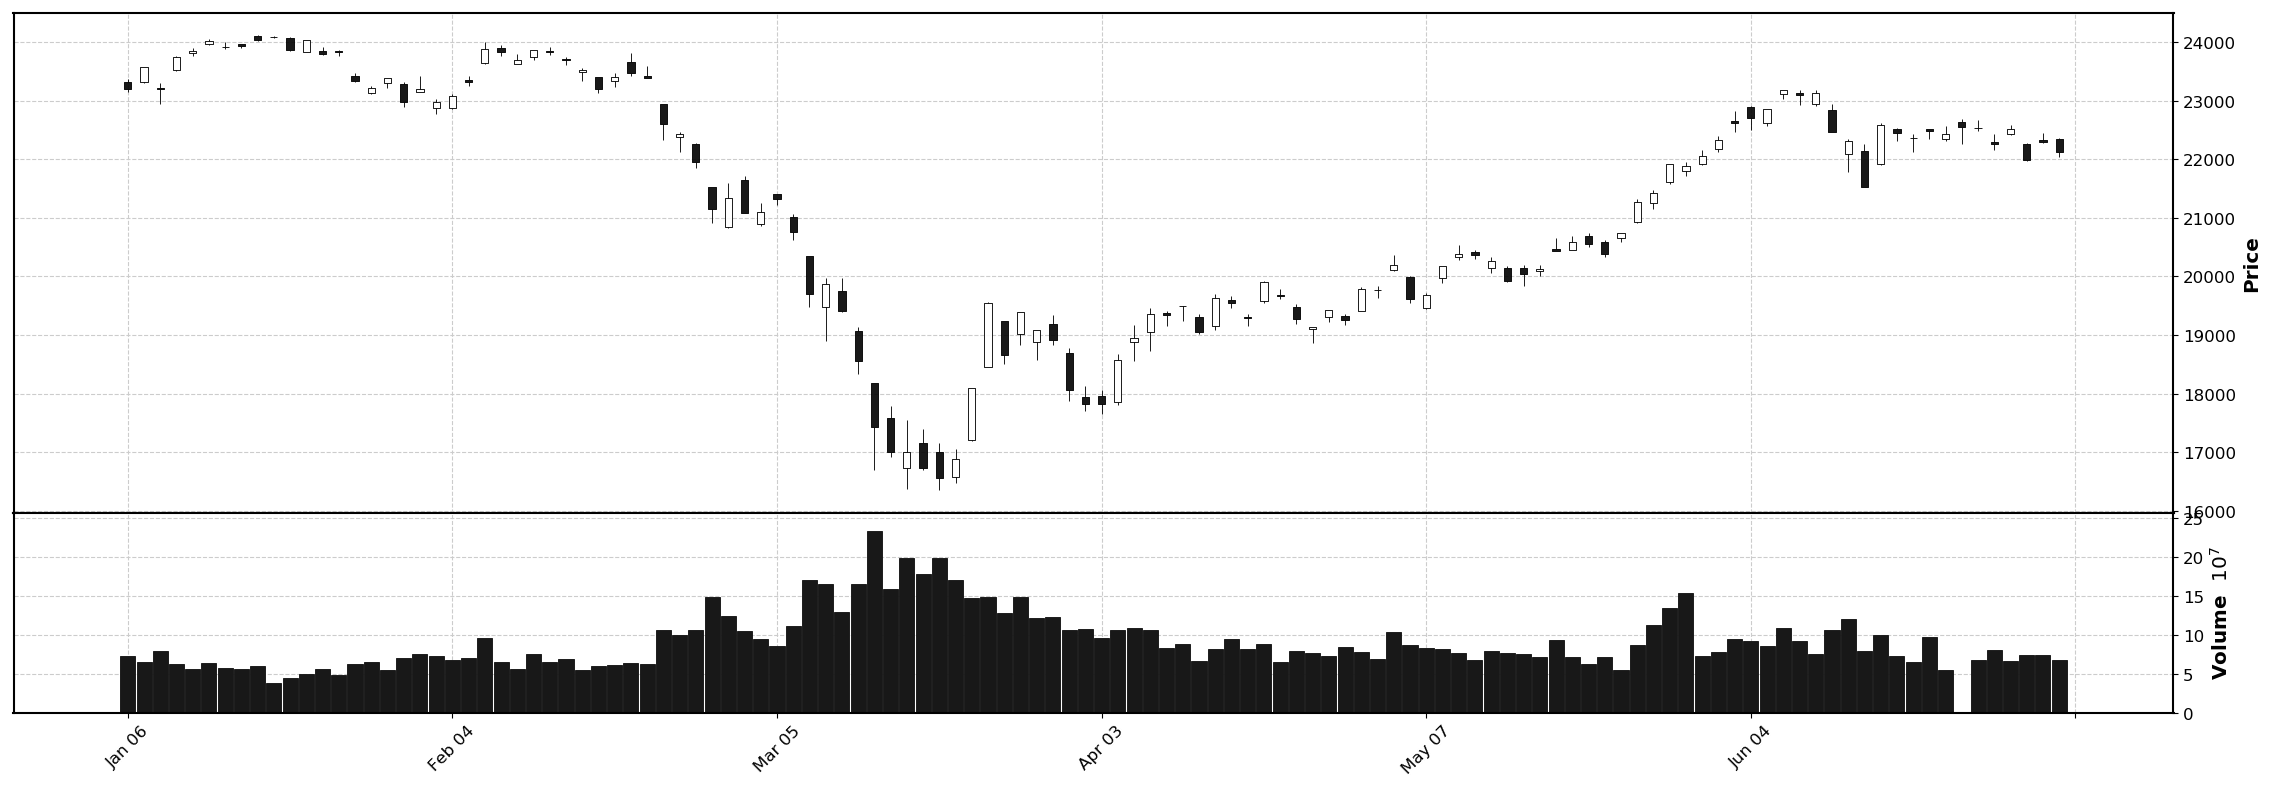

In [6]:
mpf.plot(df,type='candle',figsize=(30,10),style='classic',volume=True)

In [7]:
import talib as ta
df["upper"],df["middle"],df["lower"] = ta.BBANDS(df['Adj Close'],timeperiod=25,nbdevup=2,nbdevdn=2,matype=0)

In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower
Date,,,,,,,,,
2020-06-25,22423.410156,22165.140625,22287.869141,22259.789062,80800000,22259.789062,23589.084373,22221.268437,20853.452502
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,23454.238943,22306.225234,21158.211526
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,23321.613062,22356.360781,21391.108501
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,23255.768474,22397.039609,21538.310745
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,23195.468324,22425.139609,21654.810895


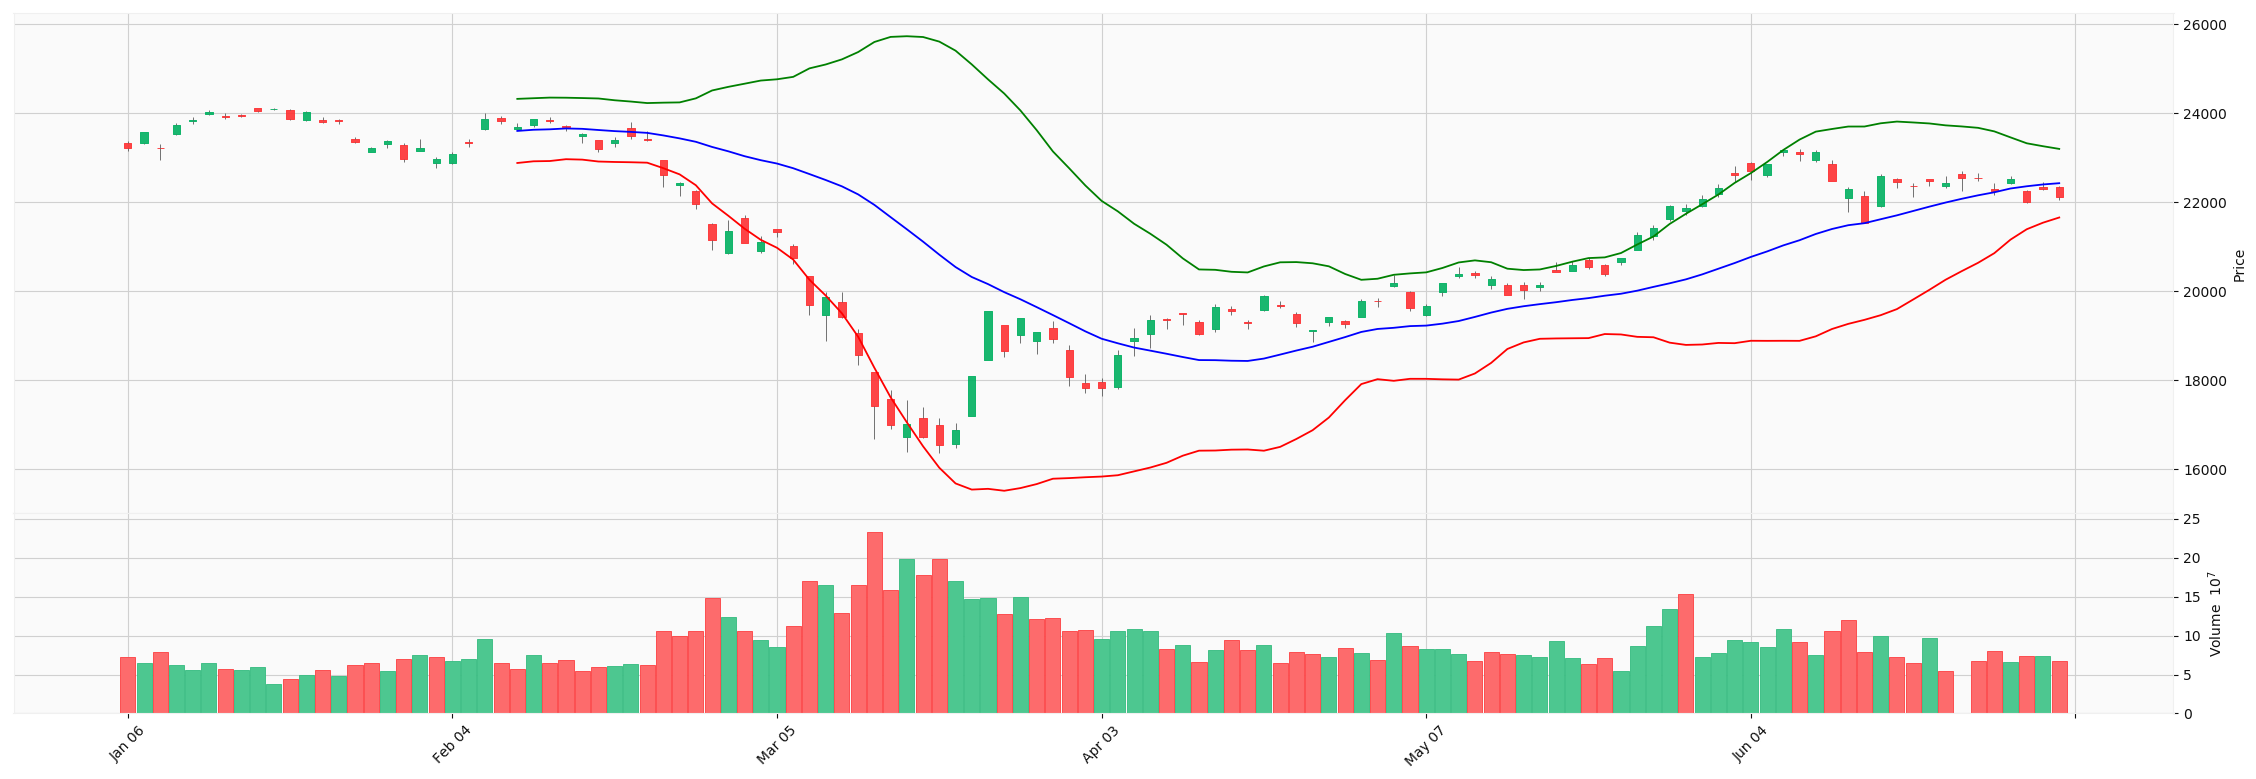

In [9]:
#mplfinanceにopen,high,low,close以外の項目を追加
apds=[mpf.make_addplot(df['upper'],color='g'),
      mpf.make_addplot(df['middle'],color='b'),
      mpf.make_addplot(df['lower'],color='r')
     ]
mpf.plot(df,type='candle',figsize=(30,10),style='yahoo',volume=True,addplot=apds)

In [10]:
df['macd'],df['macdsignal'],df['macdhist']=ta.MACD(df['Adj Close'],fastperiod=12,slowperiod=24,signalperiod=9)

In [11]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2020-06-25,22423.410156,22165.140625,22287.869141,22259.789062,80800000,22259.789062,23589.084373,22221.268437,20853.452502,313.818950,420.299747,-106.480798
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,23454.238943,22306.225234,21158.211526,297.718835,395.783565,-98.064730
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,23321.613062,22356.360781,21391.108501,243.339792,365.294810,-121.955018
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,23255.768474,22397.039609,21538.310745,219.657271,336.167302,-116.510032
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,23195.468324,22425.139609,21654.810895,186.229114,306.179665,-119.950550


In [ ]:
apds=[mpf.make_addplot(df['upper'],color='g'),
      mpf.make_addplot(df['middle'],color='b'),
      mpf.make_addplot(df['lower'],color='r'),
      mpf.make_addplot(df['macdhist'],type='bar',color='gray',width=1.0,panel=1,alpha=0.5,ylabel='MACD')
     ]
#panel=グラフを追加する順番, 0,1,2の順番でグラフが描写される

mpf.plot(df,type='candle',figsize=(30,10),style='yahoo',volume=True,addplot=apds,volume_panel=2,panel_ratios=(3,1,1))
#volume_panel=出来高を表示する順番, panel_ratios=